## Grupo [RuralApp] Turma: [2TDSJ]
- **Nome:** Guilherme Tomaz **RM:** 88110
- **Nome:** Hevylle Daiane Carneiro dos Santos **RM:** 87248
- **Nome:** João Batista Souza do Nascimento **RM:** 88298
- **Nome:** Leonardo Lima de Souza **RM:** 87233
- **Nome:** Luan de Oliveira Brito Sousa **RM:** 89352

In [39]:
# Acessando os datasets do tensorflow
import tensorflow_datasets as tfds

In [40]:
# Nome do dataset
dataset_name = 'horses_or_humans'

# Formato de divisão dos dados
format = ['train', 'test']

# Importando o dataset Horses or Humans
(dataset_train, dataset_test), dataset_info = tfds.load(dataset_name, split=format, as_supervised=True, with_info=True)

In [41]:
# Informações sobre os dados de treino
dataset_train

<PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [42]:
# Informações sobre os dados de teste
dataset_test

<PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [43]:
# Informações sobre o dataset de modo geral
dataset_info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

In [120]:
# Importando as classes necessárias para construir a rede
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [126]:
# Criando um modelo Convolutional Neural Network
model = Sequential([
    # CNN
    Conv2D(8, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Classificador
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Mostrando as características do modelo
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 298, 298, 8)       224       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 149, 149, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 147, 147, 16)      1168      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 73, 73, 16)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 85264)             0         
                                                                 
 dense_18 (Dense)            (None, 50)               

In [127]:
# Importando as configurações do modelo
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [128]:
# Configurando o modelo
optimizer = Adam()
loss_function = binary_crossentropy
metric = 'accuracy'

# Compilando o modelo
model.compile(optimizer=optimizer, loss=loss_function, metrics=[metric])

In [129]:
# Definindo o tamanho do lote de imagens para treino e teste
train_data_size = 128
test_data_size = 32

# Selecionando um lote de imagens para os dados de treino e teste
train_set = dataset_train.batch(train_data_size)
test_set = dataset_test.batch(test_data_size)

In [130]:
# Número de épocas de treinamento
no_epochs = 5

# Treinando os dados para o modelo
epochs_hist = model.fit(train_set, epochs=no_epochs)

Epoch 1/5
9/9 [==============================] - 41s 4s/step - loss: 205.7172 - accuracy: 0.5375
Epoch 2/5
9/9 [==============================] - 41s 4s/step - loss: 121.9169 - accuracy: 0.5706
Epoch 3/5
9/9 [==============================] - 41s 4s/step - loss: 18.0711 - accuracy: 0.8676
Epoch 4/5
9/9 [==============================] - 41s 4s/step - loss: 15.2334 - accuracy: 0.8851
Epoch 5/5
9/9 [==============================] - 41s 4s/step - loss: 4.6925 - accuracy: 0.9435


In [131]:
# Importando o pandas para plotar um gráfico
import pandas as pd

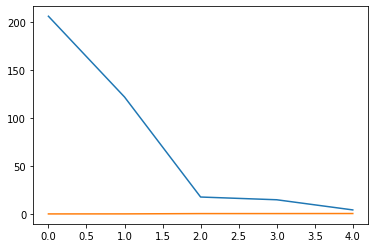

In [132]:
# Gerando um dataframe a partir do histórico de épocas
history_df = pd.DataFrame(epochs_hist.history)

# Exibindo a perda no gráfico
history_df['loss'].plot();
# Exibindo a acurácia no gráfico
history_df['accuracy'].plot();

In [133]:
# Validação com os dados de treino e de teste exibindo a perda e a acurácia
model.evaluate(train_set, verbose=2)
model.evaluate(test_set, verbose=2)

9/9 - 17s - loss: 1.7921 - accuracy: 0.9591 - 17s/epoch - 2s/step
8/8 - 4s - loss: 96.5471 - accuracy: 0.7344 - 4s/epoch - 484ms/step


[96.54712677001953, 0.734375]

In [134]:
# Importando o numpy para usar a funções de array
import numpy as np
# Importando o matplotlib para plotar uma imagem
import matplotlib.pyplot as plt
# Importando o image do keras para converter a imagem em um formato que o modelo entenda
from keras_preprocessing import image as ki

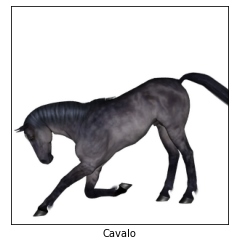

In [187]:
# Selecionando uma imagem para fazer a predição
image = 1 # Número da imagem não pode ser > 31

for images, _ in test_set.take(1):
    # Previsão com o modelo treinado
    pred = model.predict(np.array([ki.img_to_array(images[image])]))
    # Predição de classe da imagem (Cavalo ou Humano)
    plt.xlabel('Cavalo' if pred < 0.5 else 'Humano')
    # Exibindo a imagem 
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.asarray(images[image]))